In [54]:
from pathlib import Path
from metadata import ImageDataset, patient
import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
notebooks_path = Path.cwd()
repo_path = notebooks_path.parent
print(f'The current directory is: {notebooks_path}')

The current directory is: /home/ricardino/Documents/MAIA/tercer_semestre/MISA/final_project/MISA_FINAL_PROJECT/notebooks


# MAIN

## Classic models

In [85]:
#we will compute the boxplot for the following models
# model_list = ['TModel_dice_Validation', 'most_similar_dice', 'mean_atlas_dice', 'weighted_labels_dice', 'top_atlases_dice', 'bayesian_dice', 'unet_dice']
model_list = ['most_similar_metrics', 'mean_atlas_metrics', 'weighted_labels_metrics', 'top_atlases_metrics', 'bayesian_metrics',
              'EM_into_bayesian_metrics', 'EM_after_bayesian_metrics', 'TModel_metrics_Validation', 'EM_bayesian_metrics']
#we first concatenate all the csv files in a single dataframe
general_df = None
for model in model_list:
    #read csv file
    df = pd.read_csv(repo_path /'data' / 'results' / f'{model}.csv')
    #drop all columns except id_val and the tissue
    df = df.drop(columns=[col for col in df.columns if col not in ['id_val', 'CSF', 'GM', 'WM', 'metric']])
    #we add a column with the model name
    df['model'] = model
    #concatenate df in general_df
    general_df = pd.concat([general_df, df], axis=0)

#remove 'metrics' string from the model column
general_df['model'] = general_df['model'].str.replace('_metrics', '').str.replace('_', ' ')
general_df


,id_val,CSF,GM,WM,metric,model
0,11,0.780164,0.808732,0.838712,dice,most similar
1,11,12.257651,16.583124,9.055385,hd,most similar
2,11,0.037264,-0.167675,-0.005894,vdiff,most similar
3,12,0.768067,0.816139,0.806459,dice,most similar
4,12,24.289916,16.194135,8.321658,hd,most similar
...,...,...,...,...,...,...
10,14,52.497991,15.643614,11.503396,hd,EM bayesian
11,14,-1.336326,-0.161750,0.374015,vdiff,EM bayesian
12,17,0.268120,0.861337,0.653251,dice,EM bayesian
13,17,52.147340,15.465802,25.571701,hd,EM bayesian


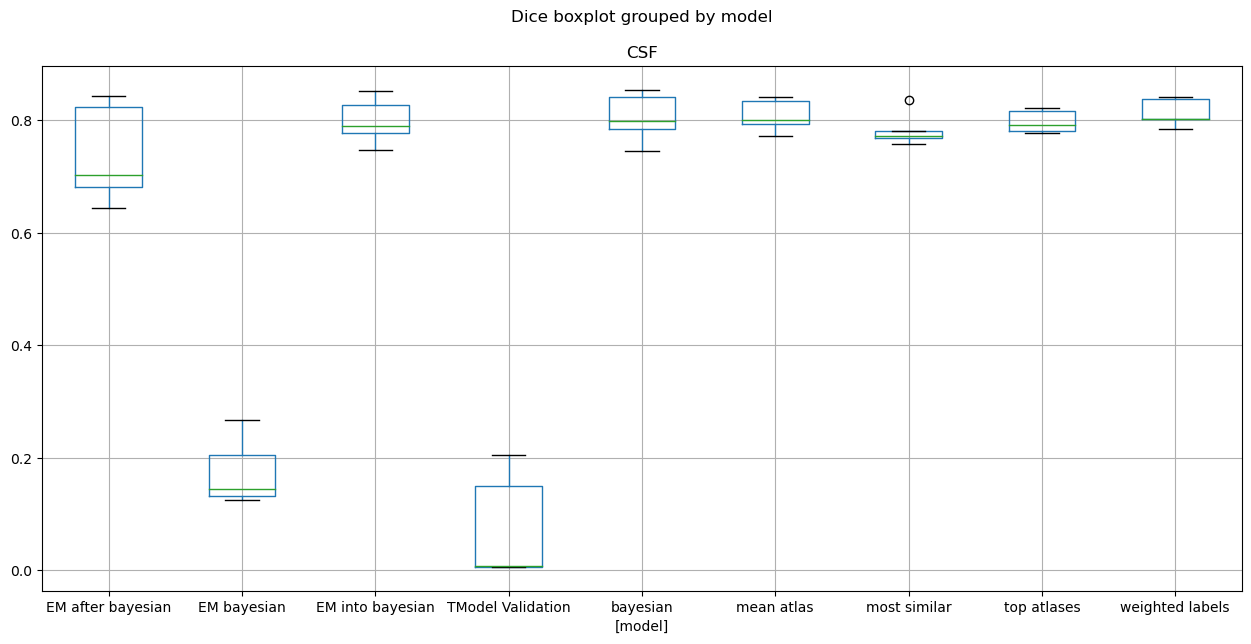

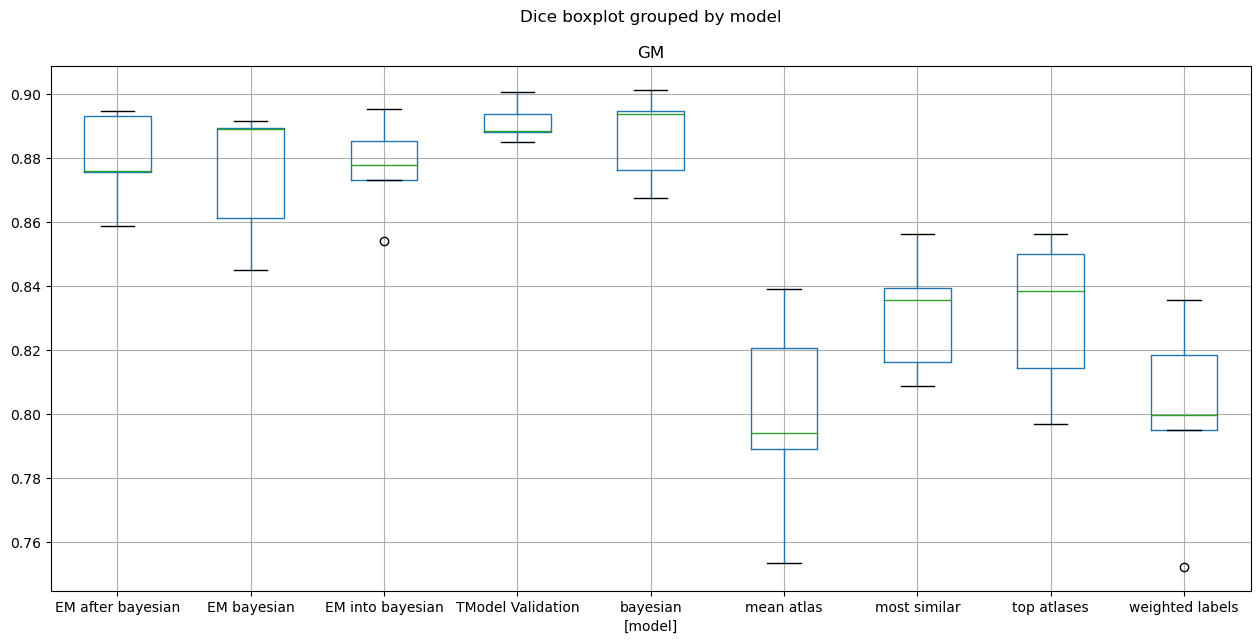

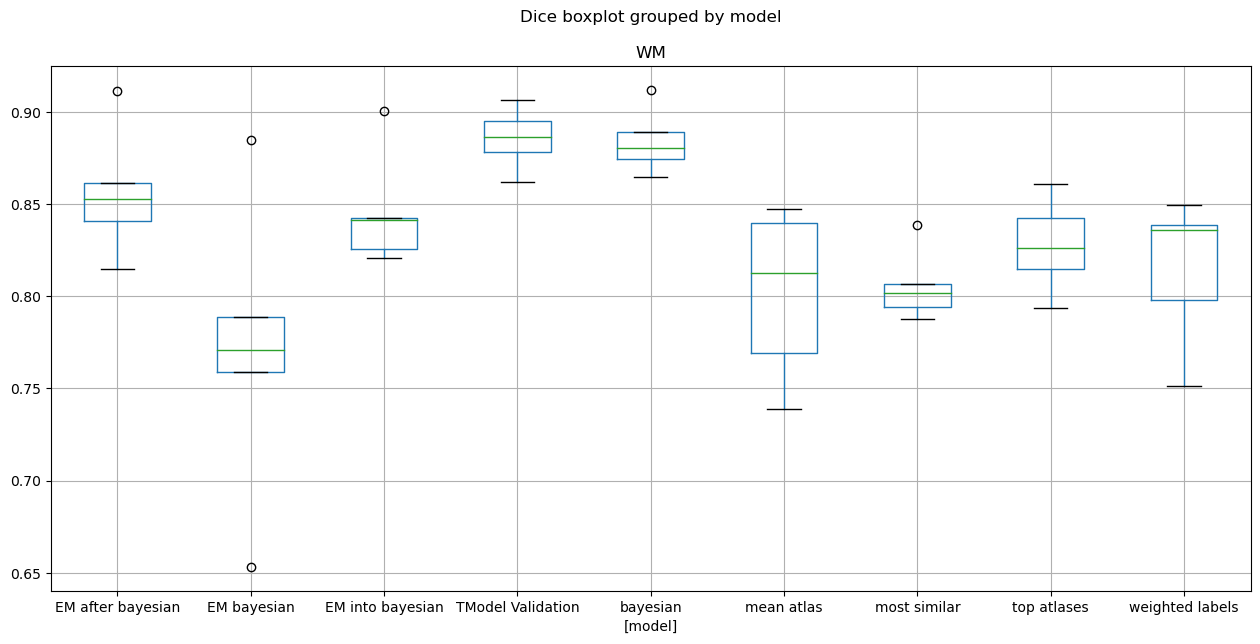

In [86]:
metric = 'dice'
group = 'model'

#we first drop all rows that are not of the metric
metriced_df = general_df[general_df['metric'] == metric]
#we now compute the boxplot for each tissue
for tissue in ['CSF', 'GM', 'WM']:
    #we select the tissue
    df_tissue = metriced_df[[tissue, group]]
    #now we compute the boxplot
    df_tissue.boxplot(by=group, figsize=(15, 7))
    #change header name
    plt.suptitle('Dice boxplot grouped by model')

## DL models

In [72]:
net_list = ['DenseUnet', 'ResUnet', 'unet']
loss_list = ['CE', 'DL', 'FL']
#create a new list with all combinations of this two lists
model_list = [f'{net}_{loss}_metrics' for net in net_list for loss in loss_list]
#remove 'Dense_Unet_DL_metrics' from the list
model_list.remove('DenseUnet_DL_metrics')
#we first concatenate all the csv files in a single dataframe
general_df = None
for model in model_list:
    #read csv file
    df = pd.read_csv(repo_path /'data' / 'results' / f'{model}.csv')
    #drop all columns except id_val and the tissue
    df = df.drop(columns=[col for col in df.columns if col not in ['id_val', 'CSF', 'GM', 'WM', 'metric']])
    #we add a column with the model name
    df['model'] = model
    #concatenate df in general_df
    general_df = pd.concat([general_df, df], axis=0)

#remove 'metrics' string from the model column
general_df['model'] = general_df['model'].str.replace('_metrics', '').str.replace('_', ' ')
general_df

,id_val,CSF,GM,WM,metric,model
0,11,0.787640,0.917630,0.926432,dice,DenseUnet CE
1,11,19.500000,11.672618,9.000000,hd,DenseUnet CE
2,11,0.018033,0.060804,-0.090840,vdiff,DenseUnet CE
3,12,0.838897,0.926753,0.928787,dice,DenseUnet CE
4,12,31.815877,10.307764,7.762087,hd,DenseUnet CE
...,...,...,...,...,...,...
10,14,124.137037,61.025129,91.663149,hd,unet FL
11,14,-0.079529,-0.043027,0.078387,vdiff,unet FL
12,17,0.893458,0.936307,0.908510,dice,unet FL
13,17,88.516936,15.649117,88.290995,hd,unet FL


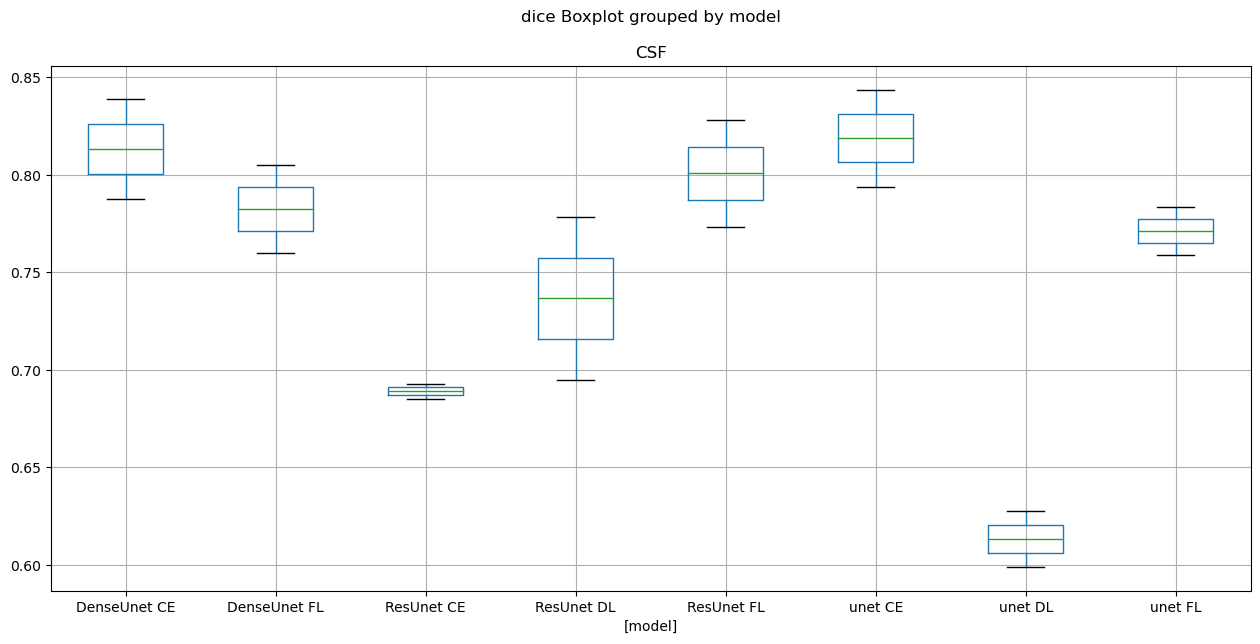

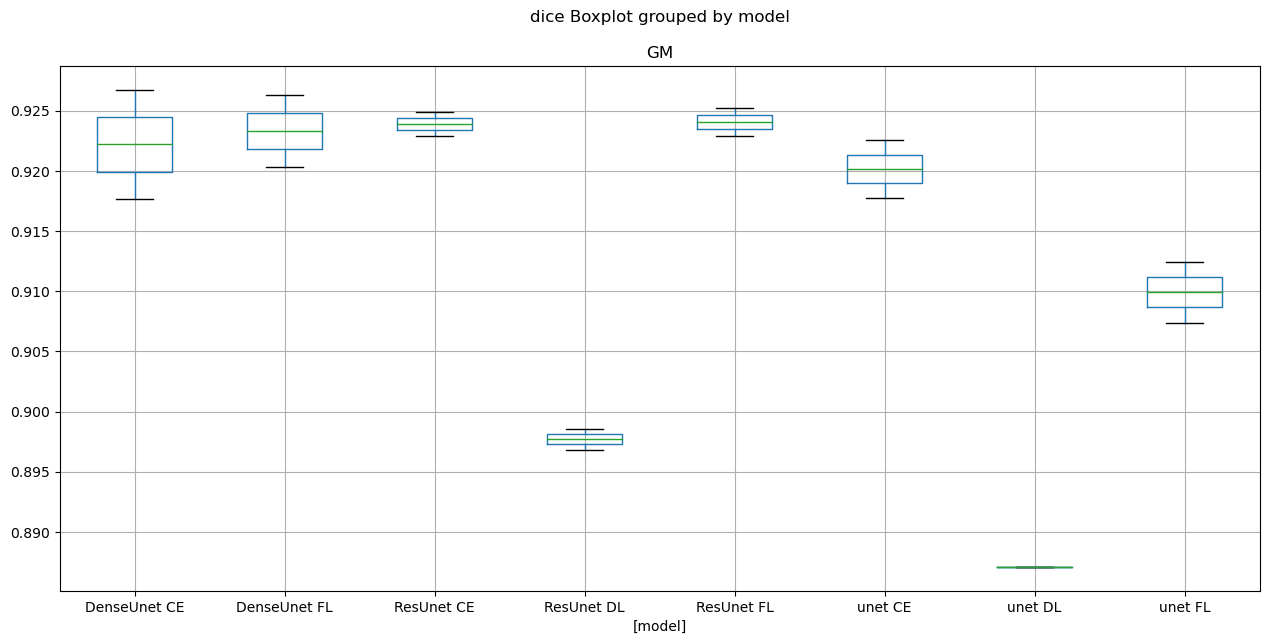

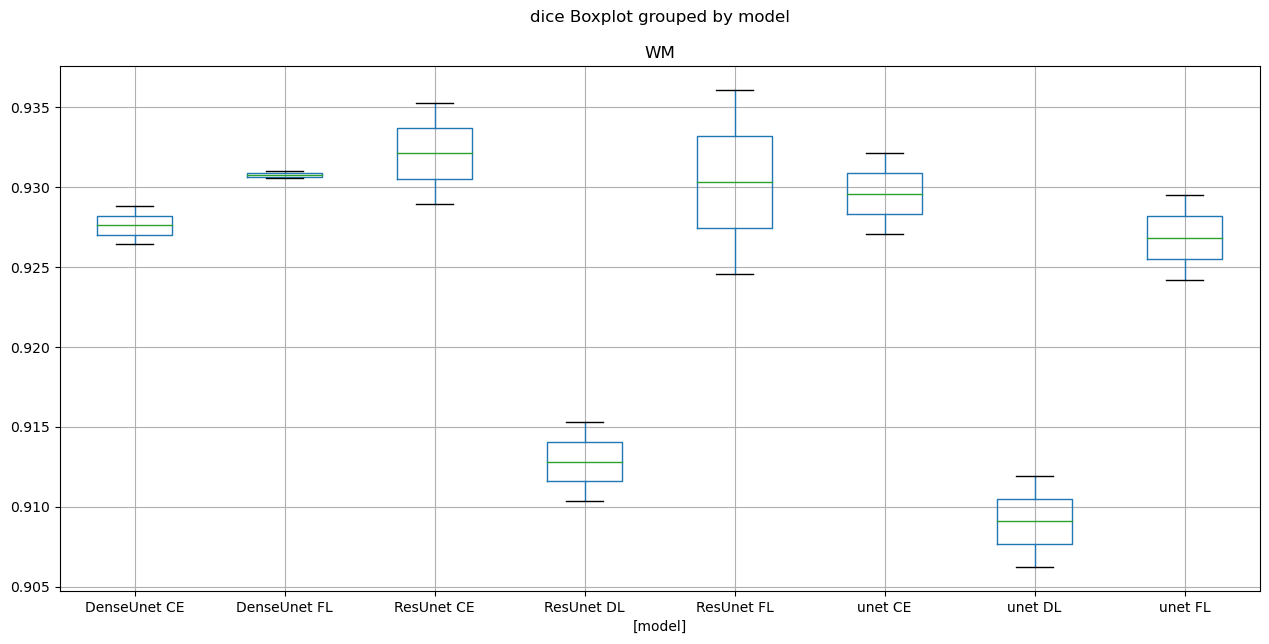

In [73]:
metric = 'dice'
group = 'model'

#we first drop all rows that are not of the metric
metriced_df = general_df[general_df['metric'] == metric]
#keep only id_val 11 and 12
metriced_df = metriced_df[metriced_df['id_val'].isin([11, 12])]
#we now compute the boxplot for each tissue
for tissue in ['CSF', 'GM', 'WM']:
    #we select the tissue
    df_tissue = metriced_df[[tissue, group]]
    #now we compute the boxplot
    df_tissue.boxplot(by=group, figsize=(15, 7))
    #change header
    plt.suptitle(f'{metric} Boxplot grouped by {group}')

## Combination of both

In [87]:
#we will compute the boxplot for the following models
model_list = ['bayesian_metrics', 'DenseUnet_CE_metrics']
#we first concatenate all the csv files in a single dataframe
general_df = None
for model in model_list:
    #read csv file
    df = pd.read_csv(repo_path /'data' / 'results' / f'{model}.csv')
    #drop all columns except id_val and the tissue
    df = df.drop(columns=[col for col in df.columns if col not in ['id_val', 'CSF', 'GM', 'WM', 'metric']])
    #we add a column with the model name
    df['model'] = model
    #concatenate df in general_df
    general_df = pd.concat([general_df, df], axis=0)

#remove 'metrics' string from the model column
general_df['model'] = general_df['model'].str.replace('_metrics', '').str.replace('_', ' ')
general_df


,id_val,CSF,GM,WM,metric,model
0,11,0.745369,0.876321,0.912090,dice,bayesian
1,11,31.658332,16.911535,9.394147,hd,bayesian
2,11,0.397456,-0.144647,0.029893,vdiff,bayesian
3,12,0.798040,0.867467,0.889136,dice,bayesian
4,12,32.268406,15.937377,7.228416,hd,bayesian
5,12,0.303928,-0.204041,0.118721,vdiff,bayesian
6,13,0.784510,0.901312,0.880275,dice,bayesian
7,13,28.740759,15.256786,12.472626,hd,bayesian
8,13,0.278554,-0.069610,0.058991,vdiff,bayesian
9,14,0.842147,0.893793,0.874581,dice,bayesian


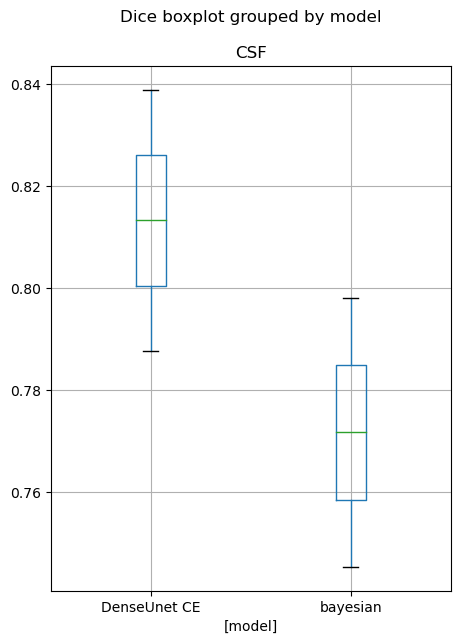

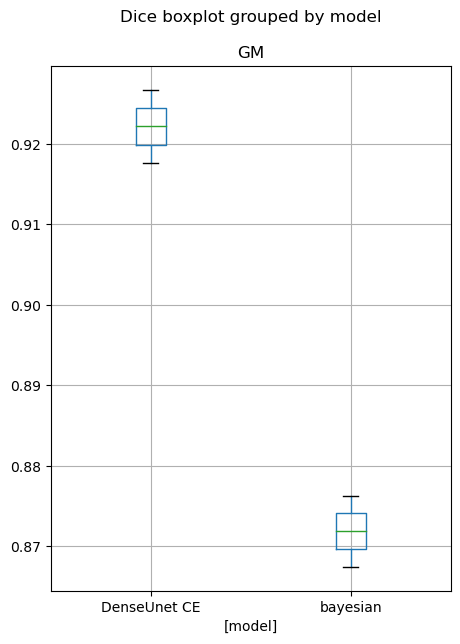

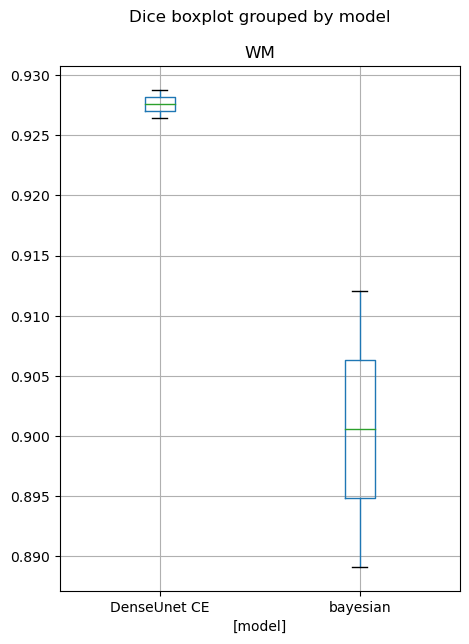

In [106]:
metric = 'dice'
group = 'model'

#we first drop all rows that are not of the metric
metriced_df = general_df[general_df['metric'] == metric]
#keep only id_val 11 and 12
metriced_df = metriced_df[metriced_df['id_val'].isin([11, 12])]
#remove id_val
metriced_df = metriced_df.drop(columns=['id_val'])
#now we compute the boxplot for each tissue in the same boxplot so they can be compared
for tissue in ['CSF', 'GM', 'WM']:
    #we select the tissue
    df_tissue = metriced_df[[tissue, group]]
    #now we compute the boxplot
    df_tissue.boxplot(by=group, figsize=(5, 7))
    #change header
    plt.suptitle(f'Dice boxplot grouped by {group}')